In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from pandas import DataFrame as df

## (a) Data Generate, h_rot, estimate the density

In [54]:
#1 Data Generate
data = []
for i in range(150):
    Z = np.random.choice([0,1], p=[0.5, 0.5])
    y1 = np.random.normal(-3, 1.5)
    y2 = np.random.normal(1, 1)
    
    y = Z*y1 + (1-Z)*y2
    data.append(y)

In [57]:
data_in_use = data

<function matplotlib.pyplot.show(close=None, block=None)>

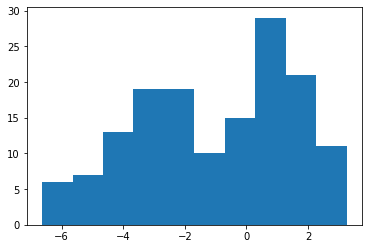

In [58]:
plt.hist(data_in_use)
plt.show

In [64]:
#2 Kernel Density Estimation
def pdf_f(data_point_x, bandwidth_h):
    '''
    input: data point, h_rot
    output: pdf value of x estimated with kernel function
    '''
    n = 150
    h = bandwidth_h

    sigma_part = 0
    for X in data_in_use:
        u = (X - data_point_x)/h
        K = (1/(math.sqrt(2*math.pi))) * math.exp(-(u**2)/2)
        sigma_part += K

    pdf_value = (1/(n*h))*sigma_part  
    return pdf_value

In [69]:
#calculate h_rot 
#since the histogram shows bimodal shape I would use 0.9 rather than 1.06
h_rot = 0.9*np.std(np.array(data_in_use))*(150**(-1/5))
print("h ROT : ", h_rot)

h ROT :  0.8159335747662992


In [70]:
kernel_estimate1 = []
for x in data_in_use:
    temp_value = pdf_f(x, h_rot)
    kernel_estimate1.append(temp_value)

In [116]:
def data_to_plot(kernel_estimate):
    '''
    input: estimtated result
    output: df for graph
    '''
    data = {'x'  : data_in_use,
            'pdf' : kernel_estimate}
    data_frame = df(data)
    grid = np.linspace(-6, 4, 21)
    
    group_index = []
    for x in data_in_use: 
        for j in range(len(grid)):
            if x >= grid[j] and x < grid[j+1]:
                break

        if x < -6:
            group_index.append(0)
        else:
            group_index.append(j)

    data_frame['group_index'] = group_index

    group_mean_value = []
    for j in range(len(grid)-1):
        group_mean_value.append((grid[j]+grid[j+1])/2)

    group_mean = [] 
    for g in group_index:
        group_mean.append(group_mean_value[g])

    data_frame['group_mean'] = group_mean
    df_result = data_frame.groupby('group_mean')['pdf'].mean()
    df_result2 = df(df_result).reset_index(drop=False)
    
    return df_result2

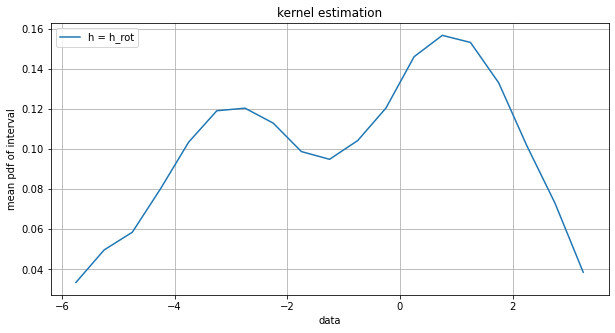

In [118]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel('data')
ax.set_ylabel('mean pdf of interval')
ax.set_title('kernel estimation')
ax.grid(True)

ax.plot(data_to_plot(kernel_estimate1).group_mean, data_to_plot(kernel_estimate1).pdf, label = 'h = h_rot')
ax.legend(loc='upper left');

<pre>
as I could check from the histogram from raw data, 
estimated kernel density has the bimodal shape
</pre>

## (b) Change ROT

In [119]:
kernel_estimate2 = []
for x in data_in_use:
    temp_value = pdf_f(x, 1.5*h_rot)
    kernel_estimate2.append(temp_value)

kernel_estimate3 = []
for x in data_in_use:
    temp_value = pdf_f(x, h_rot/2)
    kernel_estimate3.append(temp_value)

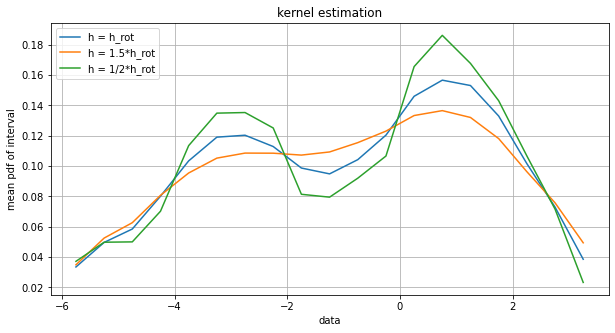

In [120]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel('data')
ax.set_ylabel('mean pdf of interval')
ax.set_title('kernel estimation')
ax.grid(True)

ax.plot(data_to_plot(kernel_estimate1).group_mean, data_to_plot(kernel_estimate1).pdf, label = 'h = h_rot')
ax.plot(data_to_plot(kernel_estimate2).group_mean, data_to_plot(kernel_estimate2).pdf, label = 'h = 1.5*h_rot') 
ax.plot(data_to_plot(kernel_estimate3).group_mean, data_to_plot(kernel_estimate3).pdf, label = 'h = 1/2*h_rot')
ax.legend(loc='upper left');

<pre>
as bandwith <b>grows larger</b>, estimated density becomes <b>smoother</b>
whereas when bandwith <b>becomes smaller</b>, it becomes <b>less smoother</b>
</pre>

## (c) change the data and repeat the same work

In [133]:
#1 Data Generate
data = []
for i in range(150):
    Z = np.random.choice([0,1], p=[0.5, 0.5])
    y1 = np.random.normal(-3, 0.15)
    y2 = np.random.normal(1, 1)
    
    y = Z*y1 + (1-Z)*y2
    data.append(y)
    
data_in_use2 = data

In [134]:
kernel_estimate1 = []
for x in data_in_use2:
    temp_value = pdf_f(x, h_rot)
    kernel_estimate1.append(temp_value)
    
kernel_estimate2 = []
for x in data_in_use2:
    temp_value = pdf_f(x, 1.5*h_rot)
    kernel_estimate2.append(temp_value)

kernel_estimate3 = []
for x in data_in_use2:
    temp_value = pdf_f(x, h_rot/2)
    kernel_estimate3.append(temp_value)

<function matplotlib.pyplot.show(close=None, block=None)>

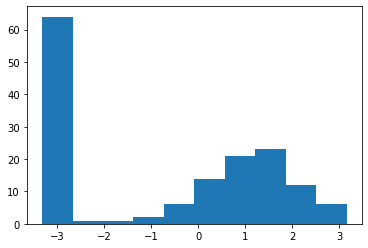

In [135]:
plt.hist(data_in_use2)
plt.show

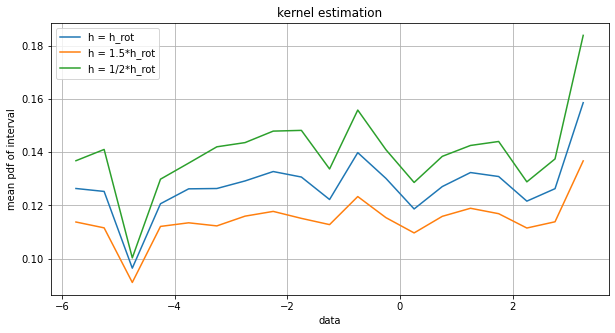

In [136]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel('data')
ax.set_ylabel('mean pdf of interval')
ax.set_title('kernel estimation')
ax.grid(True)

ax.plot(data_to_plot(kernel_estimate1).group_mean, data_to_plot(kernel_estimate1).pdf, label = 'h = h_rot')
ax.plot(data_to_plot(kernel_estimate2).group_mean, data_to_plot(kernel_estimate2).pdf, label = 'h = 1.5*h_rot') 
ax.plot(data_to_plot(kernel_estimate3).group_mean, data_to_plot(kernel_estimate3).pdf, label = 'h = 1/2*h_rot')
ax.legend(loc='upper left');